About the data
It is about the housing prices in USA.
The objective is to be able to predict the pricing of the house based on the remaining features in the table using linear regression.
The data contains the following columns:

'Avg. Area Income': Avg. Income of residents of the city house is located in.

'Avg. Area House Age': Avg Age of Houses in same city.

'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city.

'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city.

'Area Population': Population of city house is located in.

'Price': Price that the house sold at.

'Address': Address for the house

link: https://www.kaggle.com/vedavyasv/usa-housing


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#using pandas for easier visualisation of the data
import pandas as pd
df=pd.read_csv('USA_Housing.csv', sep=',',header=None)
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
1,79545.45857431678,5.682861321615587,7.009188142792237,4.09,23086.800502686456,1059033.5578701235,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
2,79248.64245482568,6.0028998082752425,6.730821019094919,3.09,40173.07217364482,1505890.91484695,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
3,61287.067178656784,5.865889840310001,8.512727430375099,5.13,36882.15939970458,1058987.9878760849,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
4,63345.24004622798,7.1882360945186425,5.586728664827653,3.26,34310.24283090706,1260616.8066294468,USS Barnett\nFPO AP 44820
5,59982.197225708034,5.040554523106283,7.839387785120487,4.23,26354.109472103148,630943.4893385402,USNS Raymond\nFPO AE 09386


In [3]:
#for simplicity we drop the Address columns as it is not numeric and does not help in regression.
df = df.drop(['Address'],axis = 1)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
1,79545.45857431678,5.682861321615587,7.009188142792237,4.09,23086.800502686456,1059033.5578701235
2,79248.64245482568,6.0028998082752425,6.730821019094919,3.09,40173.07217364482,1505890.91484695
3,61287.067178656784,5.865889840310001,8.512727430375099,5.13,36882.15939970458,1058987.9878760849
4,63345.24004622798,7.1882360945186425,5.586728664827653,3.26,34310.24283090706,1260616.8066294468
5,59982.197225708034,5.040554523106283,7.839387785120487,4.23,26354.109472103148,630943.4893385402


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 1 to 5000
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Avg. Area Income              5000 non-null   object
 1   Avg. Area House Age           5000 non-null   object
 2   Avg. Area Number of Rooms     5000 non-null   object
 3   Avg. Area Number of Bedrooms  5000 non-null   object
 4   Area Population               5000 non-null   object
 5   Price                         5000 non-null   object
dtypes: object(6)
memory usage: 234.5+ KB


In [5]:
df = df.astype(float) #convert all data type to float for calculations
# It is a dataset of 5000 data points with 5 features and the price
# There seems to be no null values in the data
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
#since data is very varied accross the features we use normalisation
def normalized_data(data):
    means = np.mean(data, axis=0) #calculate the mean
    stds = np.std(data, axis=0) #calculate the std 
    data_norm = (data - means) / stds
    return data_norm

In [7]:
df_norm =  normalized_data(df)
df_norm.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
1,1.028660,-0.296927,0.021274,0.088062,-1.317599,-0.490081
2,1.000808,0.025902,-0.255506,-0.722301,0.403999,0.775508
3,-0.684629,-0.112303,1.516243,0.930840,0.072410,-0.490211
4,-0.491499,1.221572,-1.393077,-0.584540,-0.186734,0.080843
5,-0.807073,-0.944834,0.846742,0.201513,-0.988387,-1.702518


In [8]:
#since our target is Price that will be the value of y
y = np.array(df_norm['Price'])
y[:5]
#y.shape

array([-0.49008146,  0.77550829, -0.49021053,  0.08084277, -1.70251849])

In [11]:
#confirmation of slicing to add to X
df_norm.iloc[:5,:-1]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1,1.028660,-0.296927,0.021274,0.088062,-1.317599
2,1.000808,0.025902,-0.255506,-0.722301,0.403999
3,-0.684629,-0.112303,1.516243,0.930840,0.072410
4,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
5,-0.807073,-0.944834,0.846742,0.201513,-0.988387


In [12]:
#X will be the rest of the features in the dataframe
X = np.array(df_norm.iloc[:,:-1])
X.shape

(5000, 5)

In [13]:
#adding an intercept to X
X = np.insert(X, 0, 1, axis=1)

In [14]:
#Visualising the shape of each X and y
print(X[:5])
print(y[:5])
print(X.shape)
print(y.shape)

[[ 1.          1.02865969 -0.29692705  0.02127433  0.08806222 -1.31759867]
 [ 1.          1.00080775  0.02590164 -0.25550611 -0.72230146  0.40399945]
 [ 1.         -0.68462916 -0.11230283  1.5162435   0.93084045  0.07240989]
 [ 1.         -0.49149907  1.22157207 -1.39307717 -0.58453963 -0.18673422]
 [ 1.         -0.80707253 -0.94483368  0.84674187  0.20151314 -0.98838741]]
[-0.49008146  0.77550829 -0.49021053  0.08084277 -1.70251849]
(5000, 6)
(5000,)


In [15]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3500, 6)
(3500,)
(1500, 6)
(1500,)


# The Normal equation method


In [19]:
#the norm equation to the find best theta for the linear regression
def normal_equation(X,y):
    theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)),X.T),y)
    return theta

In [20]:
theta = norm_eq(X_train,y_train)
theta

array([-0.00224882,  0.65272181,  0.46493181,  0.34132186,  0.00825197,
        0.42771714])

In [22]:
y_hat =  np.matmul(X_test,theta)

In [23]:
#to calculate the goodness of fit
def goodness_of_fit(y, y_predicted):
    r_square = 1-(np.sum((y-y_predicted)**2)/np.sum((y-np.mean(y))**2))
    #raise NotImplementedError()
    return r_square

In [24]:
r_sq_norm = goodness_of_fit(y_test, y_hat)
r_sq_norm

0.9146818498754016

0.9146818498754016 seems like a very good value for r2. Hence our model performs well to predict the Housing Price given the above features using normal equation.

# Now using Gradient Descent

In [25]:
#define the functions
def h(X,theta):
    y_predicted = np.dot(X,theta)
    return y_predicted

def cost(theta, X, y):
    yhat = h(X,theta)
    dy = yhat - y
    J = (1/2) * (dy.T@ dy)
    return J

def gradient(X, y, theta):
    grad = X.T @((X@theta)-y)    
    return grad

def gradient_descent(X, y, theta_initial, alpha, num_iters):
    J_per_iter = np.zeros(num_iters)
    gradient_per_iter = np.zeros((num_iters,len(theta_initial)))
    # initialize theta
    theta = theta_initial
    for iter in np.arange(num_iters):
        grad = gradient(X, y, theta)
        theta = theta - alpha * grad
        J_per_iter[iter] = cost(theta, X, y)
        gradient_per_iter[iter] = grad.T
    return (theta, J_per_iter, gradient_per_iter)

In [26]:
theta_i = np.zeros((6))
alpha = 0.0001
num_of_iters = 25


(theta, J_per_iter, gradient_per_iter) = gradient_descent(X_train, y_train, 
                                                          theta_initial = theta_i , alpha = alpha, num_iters = 25)
print("theta:", theta)
print("J_per_iter:", J_per_iter)
print("gradient_per_iter", gradient_per_iter)

theta: [-0.00226017  0.65263454  0.46488404  0.34022982  0.00937518  0.42772553]
J_per_iter: [822.51648793 433.84450544 271.99870377 202.61817602 172.03445028
 158.12909374 151.5699591  148.33851446 146.66703649 145.75784043
 145.23925823 144.93112455 144.74197301 144.62299881 144.54685734
 144.49754417 144.46535009 144.44422097 144.43030594 144.42112138
 144.41505037 144.41103369 144.40837459 144.40661355 144.40544699]
gradient_per_iter [[ 3.81986485e+01 -2.30230117e+03 -1.62283340e+03 -1.19300433e+03
  -6.44717650e+02 -1.45058989e+03]
 [ 1.48087920e+01 -1.48331317e+03 -1.05512112e+03 -6.75777061e+02
  -2.06511244e+02 -9.61602107e+02]
 [ 2.97317861e+00 -9.57947018e+02 -6.86065170e+02 -4.09400385e+02
  -1.14391541e+01 -6.36265935e+02]
 [-2.49541756e+00 -6.20020300e+02 -4.46235769e+02 -2.66792786e+02
   6.80281872e+01 -4.20347093e+02]
 [-4.57824654e+00 -4.02159419e+02 -2.90403301e+02 -1.86140343e+02
   9.37052072e+01 -2.77324687e+02]
 [-4.95658710e+00 -2.61421072e+02 -1.89141123e+02 -1.

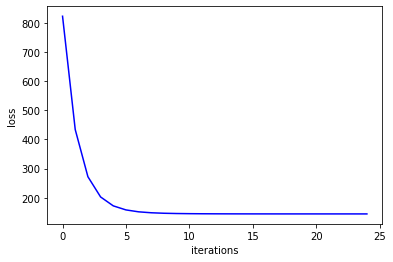

In [27]:
iterations = J_per_iter.shape[0]
def cost_plot(iterations, costs):
    x_loss = np.arange(0, iterations, 1)

    plt.plot(x_loss, costs, 'b-')
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.show()
    
cost_plot(iterations, J_per_iter)

The loss seems stable after 5th iteration. So only 5 iterations should be enough to give a good model.

In [28]:
y_hat_gd =  h(X_test, theta)

In [29]:
r_sq_gd = goodness_of_fit(y_test, y_hat_gd)
r_sq_gd

0.9146605160859345

The r2 value is very similar to that from normal equation.
Hence for linear regression you can use normal equation directly instead of Gradient descent.
